<!--NAVIGATION-->
< [Characterization](01.02-Characterization.ipynb) | [Contents](Index.ipynb) | [Results From Sensitivity Analysis](01.04-Results-From-Sensitivity-Analysis.ipynb) >

# Parametric Analysis

In [1]:
%load_ext dotenv
%dotenv

In [13]:
from surrogate_schema import APIClient

# typical block to authenticate to the API
client = APIClient()
client.whoami()  # shows that you are properly authenticated

User(username='s.letellierduchesne', email='sam@cabonsignal.com', full_name='Samuel Letellier-Duchesne', disabled=None, valid_until=datetime.datetime(2026, 7, 15, 16, 39, 23))

/Users/samueld/PycharmProjects/surrogate-api/.venv/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package energy-pandas is out of date. Your version is 0.3.5, the latest is 0.4.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


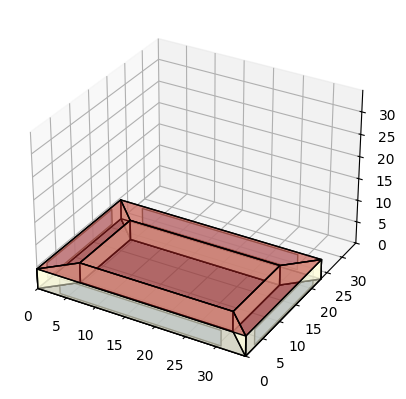

(<Figure size 640x480 with 1 Axes>, [<Axes3D: >])

In [3]:
from archetypal import IDF

idf = IDF("data/seed_file_V960.idf")
idf.view_model()

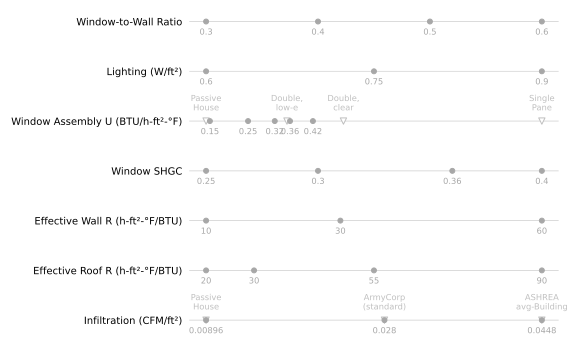

In [4]:
from surrogate_schema import Space

space = Space(
    categoricals=[
        {"name": "WWR", "categories": (0.3, 0.4, 0.5, 0.6)},
        {"name": "LPD", "categories": (0.6, 0.75, 0.9)},
        {
            "name": "WINU",
            "categories": (0.42, 0.36, 0.32, 0.25, 0.15),
        },
        {
            "name": "WINSHGC",
            "categories": (0.4, 0.36, 0.3, 0.25),
        },
        {"name": "WALLR", "categories": (10, 30, 60)},
        {"name": "ROOFR", "categories": (20, 30, 55, 90)},
        {"name": "INFIL", "categories": (0.00896, 0.028, 0.0448)},
    ],
)
space

In [5]:
from surrogate_schema import BuildingAnalysis

analysis = BuildingAnalysis(
    company="Elementa",
    project="Carbon Forecasting Tool",
    local_epw="data/USA_CA_Chino.AP.722899_TMYx.epw",
    local_seed_model="data/seed_file_V960.idf",
    design_space=space,
    baseline={
        "WWR": 0.3,
        "LPD": .75,
        "WINU": 0.36,
        "WINSHGC": 0.36,
        "WALLR": 30,
        "ROOFR": 30,
        "INFIL": 0.028,       
    },
    analysis_id='384d0155-35d7-4354-b994-42261d3d0556',  # this can be empty
)

In [6]:
analysis.create_space(200)

SampledSpace(space=Space(dimensions=[Dimension(name='WWR', categories=[0.3, 0.4, 0.5, 0.6], low=None, high=None, baseline=None, base=10, transformer=None, prior=None, dtype=dtype('float64'), practical_ranges=None), Dimension(name='LPD', categories=[0.6, 0.75, 0.9], low=None, high=None, baseline=None, base=10, transformer=None, prior=None, dtype=dtype('float64'), practical_ranges=None), Dimension(name='WINU', categories=[0.42, 0.36, 0.32, 0.25, 0.15], low=None, high=None, baseline=None, base=10, transformer=None, prior=None, dtype=dtype('float64'), practical_ranges={'Passive House': 0.14, 'Single Pane': 1.02, 'Double, clear': 0.5, 'Double, low-e': 0.352}), Dimension(name='WINSHGC', categories=[0.4, 0.36, 0.3, 0.25], low=None, high=None, baseline=None, base=10, transformer=None, prior=None, dtype=dtype('float64'), practical_ranges=None), Dimension(name='WALLR', categories=[10.0, 30.0, 60.0], low=None, high=None, baseline=None, base=10, transformer=None, prior=None, dtype=dtype('float64')

In [7]:
job = analysis.prepare_job()
job[0].model_dump()

{'jobName': 'parametric_384d0155-35d7-4354-b994-42261d3d0556',
 'jobQueue': 'dev',
 'arrayProperties': {'size': 200},
 'tags': {'Project': 'Carbon Forecasting Tool',
  'Company': 'Elementa',
  'SubmittedBy': 'sam@cabonsignal_com'},
 'propagateTags': True,
 'parameters': {'log_level': <LogLevel.INFO: 'INFO'>,
  'run_number': None,
  'parameters': 's3://surrogate-api/parametric/384d0155-35d7-4354-b994-42261d3d0556/parameters.json',
  'prototype_model': 's3://surrogate-api/parametric/384d0155-35d7-4354-b994-42261d3d0556/seed_file_V960.idf',
  'form_factor': None,
  'template_library': None,
  'ddy_file': None,
  'idf_output_dir': 's3://surrogate-api/parametric/384d0155-35d7-4354-b994-42261d3d0556/idfs/',
  'output_meters': None,
  'output_variables': None,
  'include': None,
  'table_name': 'single-building-analysis',
  'start_index': '0',
  'reporting_frequency': 'Monthly',
  'upload_to_s3': False},
 'containerOverrides': {'command': ['--log-level',
   'Ref::log_level',
   'generate-idf-

In [8]:
job[0].print_command()

'--log-level INFO generate-idf-and-run --parameters s3://surrogate-api/parametric/384d0155-35d7-4354-b994-42261d3d0556/parameters.json --prototype-model s3://surrogate-api/parametric/384d0155-35d7-4354-b994-42261d3d0556/seed_file_V960.idf --idf-output-dir s3://surrogate-api/parametric/384d0155-35d7-4354-b994-42261d3d0556/idfs/ --table-name single-building-analysis --start-index 0 --reporting-frequency Monthly'

In [12]:
analysis.submit_job()

[SubmitJobResponse(jobArn='arn:aws:batch:us-east-2:664685589714:job/5f3f4086-23af-446e-99c2-afb9b922d2c7', jobName='parametric_384d0155-35d7-4354-b994-42261d3d0556', jobId=UUID('5f3f4086-23af-446e-99c2-afb9b922d2c7'))]

In [ ]:
analysis.save("data/analysis_new_york_office.json")

In [ ]:
analysis.track_status()

In [ ]:
from surrogate_schema import BuildingAnalysis

analysis = BuildingAnalysis.model_validate_json(open("data/analysis_new_york_office.json").read())
analysis.get_job_logs(1)

In [ ]:
analysis.job[0].model_dump()

In [ ]:
analysis.job[0].print_command()

<!--NAVIGATION-->
< [Characterization](01.02-Characterization.ipynb) | [Contents](Index.ipynb) | [Results From Sensitivity Analysis](01.04-Results-From-Sensitivity-Analysis.ipynb) >